# Model Testing

# import dataset

In [28]:
from PIL import Image, ImageOps
import glob
import numpy as np
import seaborn as sns
import cv2 as cv
import pandas as pd

images = []
labels = []
reshp = lambda image : cv.resize(image,(1000,1000))
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/good/*"):
    images.append(reshp(np.asarray(ImageOps.grayscale(Image.open(f)))))
    labels.append(1)
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/bad/*"):
    images.append(reshp(np.asarray(ImageOps.grayscale(Image.open(f)))))
    labels.append(0)
    
images = np.array(images)
labels = np.array(labels)

In [31]:
print("{} images".format(len(images)))
print("{}".format(images.shape))

189 images
(189, 1000, 1000)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.70)

In [43]:
X_train.shape

(56, 1000, 1000)

In [44]:
X_test.shape

(133, 1000, 1000)

In [45]:
import matplotlib.pyplot as plt

class 1


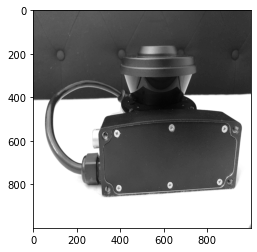

In [46]:
num = 0
plt.imshow(images[num],cmap='gray')
print("class {}".format(labels[num]))

class 0


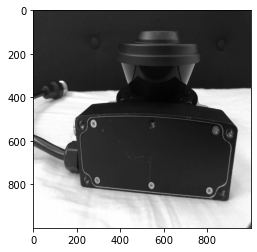

In [47]:
num = 171
plt.imshow(images[num],cmap='gray')
print("class {}".format(labels[num]))

## sklearn

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pickle

In [50]:
pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=40)), ('svc', SVC())])

In [ ]:
pipe.fit(X_train.reshape(X_train.shape[0],-1),y_train)

In [9]:
#with open('/home/dmarq/school/CSE120/model.pkl','rb') as file:
#    pipe = pickle.load(file)

In [ ]:
# training set
pipe.score(X_train.reshape(X_train.shape[0],-1),y_train)

In [ ]:
# testing set
pipe.score(X_test.reshape(X_test.shape[0],-1),y_test)

In [13]:
#with open('model.pkl','wb') as file:
#    pickle.dump(pipe,file)

In [13]:
conf = np.zeros((2,2))
for i,im in enumerate(images):
    if i < 60 or i > 120:
        conf[labels[i],pipe.predict([images[i].reshape(-1)])[0]] += 1

Text(0.5, 15.0, 'prediction')

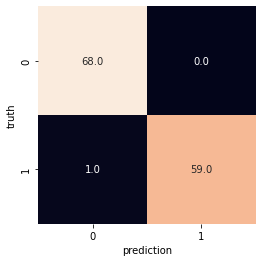

In [14]:
sns.heatmap(conf, annot=True, fmt="", cbar=False, square=True)
plt.ylabel('truth')
plt.xlabel('prediction')

In [31]:
for i, v in enumerate(pipe.predict(images[:60].reshape(images[:60].shape[0],-1))==labels[:60]):
    if v==False:
        print(i)

57


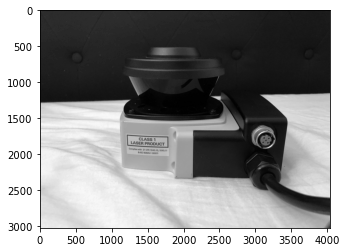

In [32]:
plt.imshow(images[57],cmap='gray')